In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_name, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
#     ax_1.legend(loc=0)
    ax_1.grid('on') # Turn axes grid on
    ax_1.legend(loc='best', fontsize=11) # Add a legend
    ax_1.set_xlabel('Epoch number')

    fig_1.tight_layout() # This minimises whitespace around the axes.
    fig_1.savefig('err_' + fig_name) # Save figure to current directory in PDF format
    
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
#     ax_2.legend(loc=0)
    ax_2.grid('on') # Turn axes grid on
    ax_2.legend(loc='best', fontsize=11) # Add a legend
    ax_2.set_xlabel('Epoch number')
    
    fig_2.tight_layout() # This minimises whitespace around the axes.
    fig_2.savefig('acc_' + fig_name) # Save figure to current directory in PDF format
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

In [3]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, RMSPropLearningRule, GradientDescentLearningRule, AdaGradLearningRule
from mlp.optimisers import Optimiser

### batch_size = 100

In [4]:
# Set batch size
batch_size = 100

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x11c9b4748>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x11c9b4780>)


## RMSprop

--------------------------------------------------------------------------------
learning_rate=2.00e-05
--------------------------------------------------------------------------------


Epoch 1: 3.0s to complete
    error(train)=2.24e+00, acc(train)=4.48e-01, error(valid)=2.24e+00, acc(valid)=4.47e-01


Epoch 2: 3.2s to complete
    error(train)=1.60e+00, acc(train)=5.70e-01, error(valid)=1.60e+00, acc(valid)=5.68e-01


Epoch 3: 3.2s to complete
    error(train)=1.38e+00, acc(train)=6.18e-01, error(valid)=1.38e+00, acc(valid)=6.13e-01


Epoch 4: 3.2s to complete
    error(train)=1.26e+00, acc(train)=6.51e-01, error(valid)=1.26e+00, acc(valid)=6.43e-01


Epoch 5: 3.5s to complete
    error(train)=1.17e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.67e-01


Epoch 6: 5.8s to complete
    error(train)=1.11e+00, acc(train)=6.86e-01, error(valid)=1.12e+00, acc(valid)=6.79e-01


Epoch 7: 4.5s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.95e-01


Epoch 8: 3.4s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.07e-01


Epoch 9: 3.4s to complete
    error(train)=9.78e-01, acc(train)=7.20e-01, error(valid)=9.89e-01, acc(valid)=7.14e-01


Epoch 10: 3.3s to complete
    error(train)=9.47e-01, acc(train)=7.29e-01, error(valid)=9.61e-01, acc(valid)=7.22e-01


Epoch 11: 3.2s to complete
    error(train)=9.15e-01, acc(train)=7.37e-01, error(valid)=9.31e-01, acc(valid)=7.30e-01


Epoch 12: 3.2s to complete
    error(train)=8.88e-01, acc(train)=7.45e-01, error(valid)=9.02e-01, acc(valid)=7.38e-01


Epoch 13: 3.0s to complete
    error(train)=8.63e-01, acc(train)=7.49e-01, error(valid)=8.79e-01, acc(valid)=7.43e-01


Epoch 14: 3.3s to complete
    error(train)=8.45e-01, acc(train)=7.55e-01, error(valid)=8.63e-01, acc(valid)=7.45e-01


Epoch 15: 3.1s to complete
    error(train)=8.23e-01, acc(train)=7.60e-01, error(valid)=8.42e-01, acc(valid)=7.52e-01


Epoch 16: 3.1s to complete
    error(train)=8.05e-01, acc(train)=7.65e-01, error(valid)=8.26e-01, acc(valid)=7.55e-01


Epoch 17: 3.2s to complete
    error(train)=7.89e-01, acc(train)=7.69e-01, error(valid)=8.11e-01, acc(valid)=7.59e-01


Epoch 18: 3.2s to complete
    error(train)=7.73e-01, acc(train)=7.72e-01, error(valid)=7.97e-01, acc(valid)=7.63e-01


Epoch 19: 3.3s to complete
    error(train)=7.61e-01, acc(train)=7.75e-01, error(valid)=7.88e-01, acc(valid)=7.67e-01


Epoch 20: 3.6s to complete
    error(train)=7.46e-01, acc(train)=7.80e-01, error(valid)=7.75e-01, acc(valid)=7.69e-01


Epoch 21: 3.4s to complete
    error(train)=7.35e-01, acc(train)=7.82e-01, error(valid)=7.68e-01, acc(valid)=7.71e-01


Epoch 22: 3.2s to complete
    error(train)=7.23e-01, acc(train)=7.85e-01, error(valid)=7.57e-01, acc(valid)=7.73e-01


Epoch 23: 3.1s to complete
    error(train)=7.13e-01, acc(train)=7.88e-01, error(valid)=7.48e-01, acc(valid)=7.76e-01


Epoch 24: 3.3s to complete
    error(train)=7.03e-01, acc(train)=7.91e-01, error(valid)=7.38e-01, acc(valid)=7.80e-01


Epoch 25: 4.1s to complete
    error(train)=6.97e-01, acc(train)=7.92e-01, error(valid)=7.35e-01, acc(valid)=7.79e-01


Epoch 26: 3.8s to complete
    error(train)=6.85e-01, acc(train)=7.96e-01, error(valid)=7.27e-01, acc(valid)=7.82e-01


Epoch 27: 3.6s to complete
    error(train)=6.79e-01, acc(train)=7.97e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


Epoch 28: 3.6s to complete
    error(train)=6.75e-01, acc(train)=7.98e-01, error(valid)=7.22e-01, acc(valid)=7.85e-01


Epoch 29: 3.6s to complete
    error(train)=6.68e-01, acc(train)=7.99e-01, error(valid)=7.15e-01, acc(valid)=7.85e-01


Epoch 30: 3.5s to complete
    error(train)=6.66e-01, acc(train)=8.00e-01, error(valid)=7.13e-01, acc(valid)=7.86e-01


Epoch 31: 3.5s to complete
    error(train)=6.55e-01, acc(train)=8.03e-01, error(valid)=7.06e-01, acc(valid)=7.89e-01


Epoch 32: 3.2s to complete
    error(train)=6.49e-01, acc(train)=8.05e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01


Epoch 33: 3.7s to complete
    error(train)=6.45e-01, acc(train)=8.06e-01, error(valid)=6.98e-01, acc(valid)=7.90e-01


Epoch 34: 3.9s to complete
    error(train)=6.40e-01, acc(train)=8.08e-01, error(valid)=6.96e-01, acc(valid)=7.93e-01


Epoch 35: 3.5s to complete
    error(train)=6.34e-01, acc(train)=8.09e-01, error(valid)=6.91e-01, acc(valid)=7.94e-01


Epoch 36: 3.5s to complete
    error(train)=6.32e-01, acc(train)=8.09e-01, error(valid)=6.91e-01, acc(valid)=7.91e-01


Epoch 37: 3.1s to complete
    error(train)=6.28e-01, acc(train)=8.11e-01, error(valid)=6.87e-01, acc(valid)=7.93e-01


Epoch 38: 3.2s to complete
    error(train)=6.27e-01, acc(train)=8.11e-01, error(valid)=6.88e-01, acc(valid)=7.94e-01


Epoch 39: 5.3s to complete
    error(train)=6.22e-01, acc(train)=8.12e-01, error(valid)=6.87e-01, acc(valid)=7.95e-01


Epoch 40: 3.5s to complete
    error(train)=6.18e-01, acc(train)=8.12e-01, error(valid)=6.83e-01, acc(valid)=7.94e-01


Epoch 41: 3.4s to complete
    error(train)=6.18e-01, acc(train)=8.13e-01, error(valid)=6.84e-01, acc(valid)=7.96e-01


Epoch 42: 3.0s to complete
    error(train)=6.10e-01, acc(train)=8.15e-01, error(valid)=6.80e-01, acc(valid)=7.98e-01


Epoch 43: 3.0s to complete
    error(train)=6.09e-01, acc(train)=8.16e-01, error(valid)=6.78e-01, acc(valid)=7.97e-01


Epoch 44: 3.0s to complete
    error(train)=6.07e-01, acc(train)=8.18e-01, error(valid)=6.83e-01, acc(valid)=7.98e-01


Epoch 45: 3.0s to complete
    error(train)=6.04e-01, acc(train)=8.16e-01, error(valid)=6.79e-01, acc(valid)=7.96e-01


Epoch 46: 3.7s to complete
    error(train)=6.04e-01, acc(train)=8.17e-01, error(valid)=6.81e-01, acc(valid)=7.99e-01


Epoch 47: 3.3s to complete
    error(train)=6.04e-01, acc(train)=8.17e-01, error(valid)=6.83e-01, acc(valid)=7.98e-01


Epoch 48: 3.1s to complete
    error(train)=6.06e-01, acc(train)=8.18e-01, error(valid)=6.92e-01, acc(valid)=7.96e-01


Epoch 49: 3.2s to complete
    error(train)=5.97e-01, acc(train)=8.20e-01, error(valid)=6.81e-01, acc(valid)=7.96e-01


Epoch 50: 3.4s to complete
    error(train)=5.97e-01, acc(train)=8.20e-01, error(valid)=6.82e-01, acc(valid)=7.97e-01


Epoch 51: 3.6s to complete
    error(train)=5.96e-01, acc(train)=8.20e-01, error(valid)=6.84e-01, acc(valid)=7.98e-01


Epoch 52: 3.7s to complete
    error(train)=5.94e-01, acc(train)=8.20e-01, error(valid)=6.82e-01, acc(valid)=7.97e-01


Epoch 53: 3.7s to complete
    error(train)=5.98e-01, acc(train)=8.20e-01, error(valid)=6.91e-01, acc(valid)=7.96e-01


Epoch 54: 3.7s to complete
    error(train)=5.96e-01, acc(train)=8.21e-01, error(valid)=6.88e-01, acc(valid)=7.97e-01


Epoch 55: 3.8s to complete
    error(train)=5.96e-01, acc(train)=8.20e-01, error(valid)=6.90e-01, acc(valid)=7.96e-01


Epoch 56: 3.7s to complete
    error(train)=5.97e-01, acc(train)=8.19e-01, error(valid)=6.90e-01, acc(valid)=7.96e-01


Epoch 57: 3.2s to complete
    error(train)=5.96e-01, acc(train)=8.22e-01, error(valid)=6.93e-01, acc(valid)=7.97e-01


Epoch 58: 3.2s to complete
    error(train)=5.97e-01, acc(train)=8.21e-01, error(valid)=6.98e-01, acc(valid)=7.94e-01


Epoch 59: 3.7s to complete
    error(train)=6.03e-01, acc(train)=8.20e-01, error(valid)=7.07e-01, acc(valid)=7.95e-01


Epoch 60: 3.2s to complete
    error(train)=6.02e-01, acc(train)=8.21e-01, error(valid)=7.02e-01, acc(valid)=7.95e-01


Epoch 61: 3.4s to complete
    error(train)=6.03e-01, acc(train)=8.20e-01, error(valid)=7.07e-01, acc(valid)=7.94e-01


Epoch 62: 3.3s to complete
    error(train)=6.06e-01, acc(train)=8.21e-01, error(valid)=7.15e-01, acc(valid)=7.95e-01


Epoch 63: 3.4s to complete
    error(train)=6.07e-01, acc(train)=8.19e-01, error(valid)=7.10e-01, acc(valid)=7.95e-01


Epoch 64: 3.5s to complete
    error(train)=6.18e-01, acc(train)=8.19e-01, error(valid)=7.30e-01, acc(valid)=7.94e-01


Epoch 65: 3.4s to complete
    error(train)=6.20e-01, acc(train)=8.18e-01, error(valid)=7.24e-01, acc(valid)=7.90e-01


Epoch 66: 3.3s to complete
    error(train)=6.35e-01, acc(train)=8.15e-01, error(valid)=7.47e-01, acc(valid)=7.90e-01


Epoch 67: 3.7s to complete
    error(train)=6.27e-01, acc(train)=8.20e-01, error(valid)=7.40e-01, acc(valid)=7.93e-01


Epoch 68: 3.6s to complete
    error(train)=6.35e-01, acc(train)=8.19e-01, error(valid)=7.52e-01, acc(valid)=7.93e-01


Epoch 69: 3.8s to complete
    error(train)=6.42e-01, acc(train)=8.17e-01, error(valid)=7.59e-01, acc(valid)=7.90e-01


Epoch 70: 3.9s to complete
    error(train)=6.40e-01, acc(train)=8.18e-01, error(valid)=7.54e-01, acc(valid)=7.92e-01


Epoch 71: 3.5s to complete
    error(train)=6.50e-01, acc(train)=8.17e-01, error(valid)=7.64e-01, acc(valid)=7.91e-01


Epoch 72: 3.7s to complete
    error(train)=6.56e-01, acc(train)=8.18e-01, error(valid)=7.74e-01, acc(valid)=7.93e-01


Epoch 73: 3.6s to complete
    error(train)=6.73e-01, acc(train)=8.11e-01, error(valid)=7.81e-01, acc(valid)=7.88e-01


Epoch 74: 3.2s to complete
    error(train)=6.77e-01, acc(train)=8.15e-01, error(valid)=7.98e-01, acc(valid)=7.89e-01


Epoch 75: 3.9s to complete
    error(train)=6.80e-01, acc(train)=8.14e-01, error(valid)=7.94e-01, acc(valid)=7.89e-01


Epoch 76: 3.3s to complete
    error(train)=6.85e-01, acc(train)=8.14e-01, error(valid)=7.97e-01, acc(valid)=7.88e-01


Epoch 77: 3.6s to complete
    error(train)=6.93e-01, acc(train)=8.13e-01, error(valid)=8.11e-01, acc(valid)=7.89e-01


Epoch 78: 3.3s to complete
    error(train)=7.05e-01, acc(train)=8.13e-01, error(valid)=8.21e-01, acc(valid)=7.86e-01


Epoch 79: 3.3s to complete
    error(train)=7.22e-01, acc(train)=8.10e-01, error(valid)=8.49e-01, acc(valid)=7.84e-01


Epoch 80: 3.1s to complete
    error(train)=7.22e-01, acc(train)=8.09e-01, error(valid)=8.43e-01, acc(valid)=7.84e-01


Epoch 81: 3.1s to complete
    error(train)=7.49e-01, acc(train)=8.04e-01, error(valid)=8.77e-01, acc(valid)=7.77e-01


Epoch 82: 3.2s to complete
    error(train)=7.51e-01, acc(train)=8.06e-01, error(valid)=8.77e-01, acc(valid)=7.82e-01


Epoch 83: 3.4s to complete
    error(train)=7.55e-01, acc(train)=8.10e-01, error(valid)=8.87e-01, acc(valid)=7.86e-01


Epoch 84: 3.1s to complete
    error(train)=7.61e-01, acc(train)=8.08e-01, error(valid)=8.90e-01, acc(valid)=7.84e-01


Epoch 85: 3.2s to complete
    error(train)=8.02e-01, acc(train)=8.04e-01, error(valid)=9.51e-01, acc(valid)=7.79e-01


Epoch 86: 3.5s to complete
    error(train)=7.88e-01, acc(train)=8.03e-01, error(valid)=9.23e-01, acc(valid)=7.81e-01


Epoch 87: 3.2s to complete
    error(train)=8.00e-01, acc(train)=8.06e-01, error(valid)=9.50e-01, acc(valid)=7.85e-01


Epoch 88: 5.3s to complete
    error(train)=8.19e-01, acc(train)=8.03e-01, error(valid)=9.69e-01, acc(valid)=7.81e-01


Epoch 89: 4.2s to complete
    error(train)=8.29e-01, acc(train)=8.01e-01, error(valid)=9.92e-01, acc(valid)=7.79e-01


Epoch 90: 4.1s to complete
    error(train)=8.55e-01, acc(train)=7.98e-01, error(valid)=1.02e+00, acc(valid)=7.75e-01


Epoch 91: 4.8s to complete
    error(train)=8.76e-01, acc(train)=8.00e-01, error(valid)=1.06e+00, acc(valid)=7.77e-01


Epoch 92: 3.7s to complete
    error(train)=8.82e-01, acc(train)=7.99e-01, error(valid)=1.07e+00, acc(valid)=7.76e-01


Epoch 93: 3.6s to complete
    error(train)=8.96e-01, acc(train)=7.98e-01, error(valid)=1.09e+00, acc(valid)=7.74e-01


Epoch 94: 3.6s to complete
    error(train)=8.92e-01, acc(train)=7.97e-01, error(valid)=1.08e+00, acc(valid)=7.72e-01


Epoch 95: 3.7s to complete
    error(train)=9.10e-01, acc(train)=7.95e-01, error(valid)=1.10e+00, acc(valid)=7.74e-01


Epoch 96: 3.5s to complete
    error(train)=9.25e-01, acc(train)=7.97e-01, error(valid)=1.12e+00, acc(valid)=7.74e-01


Epoch 97: 3.9s to complete
    error(train)=9.34e-01, acc(train)=7.95e-01, error(valid)=1.13e+00, acc(valid)=7.75e-01


Epoch 98: 3.7s to complete
    error(train)=9.45e-01, acc(train)=7.95e-01, error(valid)=1.15e+00, acc(valid)=7.73e-01


Epoch 99: 3.4s to complete
    error(train)=9.65e-01, acc(train)=7.95e-01, error(valid)=1.18e+00, acc(valid)=7.73e-01


Epoch 100: 3.5s to complete
    error(train)=9.84e-01, acc(train)=7.95e-01, error(valid)=1.21e+00, acc(valid)=7.73e-01
/Users/gabrielbadila/anaconda3/envs/mlp/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


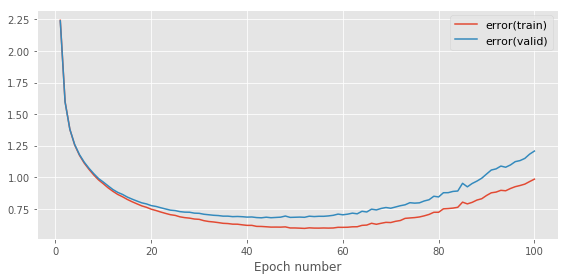

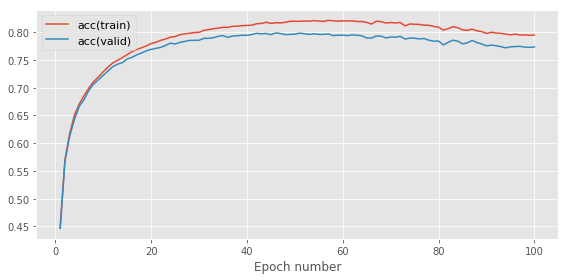

    final error(train) = 9.84e-01
    final error(valid) = 1.21e+00
    final acc(train)   = 7.95e-01
    final acc(valid)   = 7.73e-01
    run time per epoch = 4.91


In [5]:
#setup hyperparameters
learning_rate = 0.00002
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


print('-' * 80)
print('learning_rate={0:.2e}'
      .format(learning_rate))
print('-' * 80)

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create a model with three hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_name='RMSprop_three_hidden_layers.pdf', notebook=True)

plt.show()

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

# final_errors_train.append(stats[-1, keys['error(train)']])
# final_errors_valid.append(stats[-1, keys['error(valid)']])
# final_accs_train.append(stats[-1, keys['acc(train)']])
# final_accs_valid.append(stats[-1, keys['acc(valid)']])

## Adam

--------------------------------------------------------------------------------
learning_rate=2.00e-05
--------------------------------------------------------------------------------


Epoch 1: 4.6s to complete
    error(train)=2.34e+00, acc(train)=4.32e-01, error(valid)=2.34e+00, acc(valid)=4.29e-01


Epoch 2: 4.6s to complete
    error(train)=1.66e+00, acc(train)=5.57e-01, error(valid)=1.65e+00, acc(valid)=5.55e-01


Epoch 3: 4.7s to complete
    error(train)=1.42e+00, acc(train)=6.08e-01, error(valid)=1.42e+00, acc(valid)=6.03e-01


Epoch 4: 4.6s to complete
    error(train)=1.29e+00, acc(train)=6.42e-01, error(valid)=1.29e+00, acc(valid)=6.34e-01


Epoch 5: 4.7s to complete
    error(train)=1.20e+00, acc(train)=6.63e-01, error(valid)=1.21e+00, acc(valid)=6.57e-01


Epoch 6: 5.0s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.14e+00, acc(valid)=6.74e-01


Epoch 7: 4.7s to complete
    error(train)=1.09e+00, acc(train)=6.94e-01, error(valid)=1.09e+00, acc(valid)=6.87e-01


Epoch 8: 4.6s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


Epoch 9: 4.6s to complete
    error(train)=9.99e-01, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.09e-01


Epoch 10: 4.4s to complete
    error(train)=9.68e-01, acc(train)=7.23e-01, error(valid)=9.79e-01, acc(valid)=7.19e-01


Epoch 11: 4.6s to complete
    error(train)=9.34e-01, acc(train)=7.32e-01, error(valid)=9.47e-01, acc(valid)=7.27e-01


Epoch 12: 4.7s to complete
    error(train)=9.06e-01, acc(train)=7.40e-01, error(valid)=9.17e-01, acc(valid)=7.33e-01


Epoch 13: 4.6s to complete
    error(train)=8.80e-01, acc(train)=7.45e-01, error(valid)=8.93e-01, acc(valid)=7.41e-01


Epoch 14: 4.5s to complete
    error(train)=8.61e-01, acc(train)=7.50e-01, error(valid)=8.76e-01, acc(valid)=7.42e-01


Epoch 15: 4.9s to complete
    error(train)=8.40e-01, acc(train)=7.56e-01, error(valid)=8.55e-01, acc(valid)=7.48e-01


Epoch 16: 4.6s to complete
    error(train)=8.20e-01, acc(train)=7.61e-01, error(valid)=8.37e-01, acc(valid)=7.51e-01


Epoch 17: 4.5s to complete
    error(train)=8.03e-01, acc(train)=7.65e-01, error(valid)=8.21e-01, acc(valid)=7.57e-01


Epoch 18: 4.6s to complete
    error(train)=7.87e-01, acc(train)=7.68e-01, error(valid)=8.05e-01, acc(valid)=7.59e-01


Epoch 19: 4.7s to complete
    error(train)=7.75e-01, acc(train)=7.71e-01, error(valid)=7.96e-01, acc(valid)=7.64e-01


Epoch 20: 4.5s to complete
    error(train)=7.59e-01, acc(train)=7.75e-01, error(valid)=7.83e-01, acc(valid)=7.67e-01


Epoch 21: 4.5s to complete
    error(train)=7.49e-01, acc(train)=7.77e-01, error(valid)=7.76e-01, acc(valid)=7.66e-01


Epoch 22: 4.7s to complete
    error(train)=7.35e-01, acc(train)=7.82e-01, error(valid)=7.63e-01, acc(valid)=7.72e-01


Epoch 23: 4.7s to complete
    error(train)=7.24e-01, acc(train)=7.85e-01, error(valid)=7.53e-01, acc(valid)=7.73e-01


Epoch 24: 4.6s to complete
    error(train)=7.14e-01, acc(train)=7.88e-01, error(valid)=7.44e-01, acc(valid)=7.77e-01


Epoch 25: 4.5s to complete
    error(train)=7.09e-01, acc(train)=7.88e-01, error(valid)=7.40e-01, acc(valid)=7.78e-01


Epoch 26: 4.6s to complete
    error(train)=6.96e-01, acc(train)=7.92e-01, error(valid)=7.30e-01, acc(valid)=7.80e-01


Epoch 27: 4.6s to complete
    error(train)=6.90e-01, acc(train)=7.95e-01, error(valid)=7.26e-01, acc(valid)=7.81e-01


Epoch 28: 4.5s to complete
    error(train)=6.86e-01, acc(train)=7.95e-01, error(valid)=7.24e-01, acc(valid)=7.84e-01


Epoch 29: 5.4s to complete
    error(train)=6.79e-01, acc(train)=7.97e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


Epoch 30: 5.6s to complete
    error(train)=6.77e-01, acc(train)=7.97e-01, error(valid)=7.16e-01, acc(valid)=7.85e-01


Epoch 31: 4.8s to complete
    error(train)=6.65e-01, acc(train)=8.01e-01, error(valid)=7.09e-01, acc(valid)=7.87e-01


Epoch 32: 5.3s to complete
    error(train)=6.58e-01, acc(train)=8.03e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01


Epoch 33: 5.4s to complete
    error(train)=6.53e-01, acc(train)=8.04e-01, error(valid)=6.97e-01, acc(valid)=7.90e-01


Epoch 34: 5.4s to complete
    error(train)=6.49e-01, acc(train)=8.06e-01, error(valid)=6.95e-01, acc(valid)=7.94e-01


Epoch 35: 4.6s to complete
    error(train)=6.44e-01, acc(train)=8.06e-01, error(valid)=6.91e-01, acc(valid)=7.94e-01


Epoch 36: 4.6s to complete
    error(train)=6.40e-01, acc(train)=8.07e-01, error(valid)=6.90e-01, acc(valid)=7.93e-01


Epoch 37: 4.4s to complete
    error(train)=6.35e-01, acc(train)=8.09e-01, error(valid)=6.85e-01, acc(valid)=7.95e-01


Epoch 38: 4.6s to complete
    error(train)=6.35e-01, acc(train)=8.09e-01, error(valid)=6.85e-01, acc(valid)=7.94e-01


Epoch 39: 4.7s to complete
    error(train)=6.30e-01, acc(train)=8.11e-01, error(valid)=6.83e-01, acc(valid)=7.92e-01


Epoch 40: 4.6s to complete
    error(train)=6.26e-01, acc(train)=8.12e-01, error(valid)=6.80e-01, acc(valid)=7.95e-01


Epoch 41: 4.9s to complete
    error(train)=6.25e-01, acc(train)=8.11e-01, error(valid)=6.81e-01, acc(valid)=7.93e-01


Epoch 42: 5.2s to complete
    error(train)=6.18e-01, acc(train)=8.14e-01, error(valid)=6.76e-01, acc(valid)=7.95e-01


Epoch 43: 6.3s to complete
    error(train)=6.16e-01, acc(train)=8.14e-01, error(valid)=6.74e-01, acc(valid)=7.96e-01


Epoch 44: 6.6s to complete
    error(train)=6.13e-01, acc(train)=8.16e-01, error(valid)=6.76e-01, acc(valid)=7.95e-01


Epoch 45: 6.4s to complete
    error(train)=6.11e-01, acc(train)=8.15e-01, error(valid)=6.73e-01, acc(valid)=7.98e-01


Epoch 46: 5.0s to complete
    error(train)=6.13e-01, acc(train)=8.15e-01, error(valid)=6.78e-01, acc(valid)=7.96e-01


Epoch 47: 4.8s to complete
    error(train)=6.09e-01, acc(train)=8.16e-01, error(valid)=6.75e-01, acc(valid)=7.96e-01


Epoch 48: 4.8s to complete
    error(train)=6.10e-01, acc(train)=8.17e-01, error(valid)=6.81e-01, acc(valid)=7.97e-01


Epoch 49: 4.8s to complete
    error(train)=6.07e-01, acc(train)=8.17e-01, error(valid)=6.79e-01, acc(valid)=7.98e-01


Epoch 50: 5.9s to complete
    error(train)=6.05e-01, acc(train)=8.18e-01, error(valid)=6.76e-01, acc(valid)=7.98e-01


Epoch 51: 5.0s to complete
    error(train)=6.00e-01, acc(train)=8.19e-01, error(valid)=6.75e-01, acc(valid)=7.99e-01


Epoch 52: 4.9s to complete
    error(train)=5.99e-01, acc(train)=8.20e-01, error(valid)=6.76e-01, acc(valid)=7.99e-01


Epoch 53: 4.6s to complete
    error(train)=6.01e-01, acc(train)=8.19e-01, error(valid)=6.80e-01, acc(valid)=7.98e-01


Epoch 54: 4.7s to complete
    error(train)=5.95e-01, acc(train)=8.22e-01, error(valid)=6.76e-01, acc(valid)=8.01e-01


Epoch 55: 4.5s to complete
    error(train)=5.96e-01, acc(train)=8.21e-01, error(valid)=6.77e-01, acc(valid)=7.98e-01


Epoch 56: 4.8s to complete
    error(train)=5.94e-01, acc(train)=8.21e-01, error(valid)=6.76e-01, acc(valid)=8.00e-01


Epoch 57: 4.7s to complete
    error(train)=5.96e-01, acc(train)=8.21e-01, error(valid)=6.81e-01, acc(valid)=8.00e-01


Epoch 58: 4.6s to complete
    error(train)=5.97e-01, acc(train)=8.21e-01, error(valid)=6.82e-01, acc(valid)=7.99e-01


Epoch 59: 4.6s to complete
    error(train)=5.96e-01, acc(train)=8.21e-01, error(valid)=6.88e-01, acc(valid)=7.99e-01


Epoch 60: 4.7s to complete
    error(train)=5.98e-01, acc(train)=8.22e-01, error(valid)=6.87e-01, acc(valid)=7.99e-01


Epoch 61: 4.5s to complete
    error(train)=5.97e-01, acc(train)=8.22e-01, error(valid)=6.89e-01, acc(valid)=7.99e-01


Epoch 62: 5.0s to complete
    error(train)=5.97e-01, acc(train)=8.21e-01, error(valid)=6.95e-01, acc(valid)=7.98e-01


Epoch 63: 4.7s to complete
    error(train)=6.00e-01, acc(train)=8.20e-01, error(valid)=6.93e-01, acc(valid)=7.98e-01


Epoch 64: 4.6s to complete
    error(train)=6.01e-01, acc(train)=8.22e-01, error(valid)=7.00e-01, acc(valid)=7.97e-01


Epoch 65: 5.3s to complete
    error(train)=6.03e-01, acc(train)=8.21e-01, error(valid)=6.99e-01, acc(valid)=7.95e-01


Epoch 66: 4.9s to complete
    error(train)=6.07e-01, acc(train)=8.20e-01, error(valid)=7.12e-01, acc(valid)=7.93e-01


Epoch 67: 4.8s to complete
    error(train)=6.06e-01, acc(train)=8.22e-01, error(valid)=7.15e-01, acc(valid)=7.96e-01


Epoch 68: 6.0s to complete
    error(train)=6.10e-01, acc(train)=8.22e-01, error(valid)=7.22e-01, acc(valid)=7.97e-01


Epoch 69: 4.6s to complete
    error(train)=6.08e-01, acc(train)=8.20e-01, error(valid)=7.14e-01, acc(valid)=7.93e-01


Epoch 70: 5.3s to complete
    error(train)=6.06e-01, acc(train)=8.22e-01, error(valid)=7.15e-01, acc(valid)=7.99e-01


Epoch 71: 5.7s to complete
    error(train)=6.08e-01, acc(train)=8.22e-01, error(valid)=7.14e-01, acc(valid)=7.98e-01


Epoch 72: 4.9s to complete
    error(train)=6.16e-01, acc(train)=8.22e-01, error(valid)=7.29e-01, acc(valid)=7.99e-01


Epoch 73: 4.7s to complete
    error(train)=6.25e-01, acc(train)=8.16e-01, error(valid)=7.32e-01, acc(valid)=7.92e-01


Epoch 74: 4.7s to complete
    error(train)=6.24e-01, acc(train)=8.20e-01, error(valid)=7.44e-01, acc(valid)=7.96e-01


Epoch 75: 4.4s to complete
    error(train)=6.26e-01, acc(train)=8.19e-01, error(valid)=7.42e-01, acc(valid)=7.96e-01


Epoch 76: 4.2s to complete
    error(train)=6.21e-01, acc(train)=8.20e-01, error(valid)=7.31e-01, acc(valid)=7.96e-01


Epoch 77: 4.3s to complete
    error(train)=6.32e-01, acc(train)=8.17e-01, error(valid)=7.47e-01, acc(valid)=7.93e-01


Epoch 78: 4.3s to complete
    error(train)=6.33e-01, acc(train)=8.18e-01, error(valid)=7.45e-01, acc(valid)=7.93e-01


Epoch 79: 4.5s to complete
    error(train)=6.47e-01, acc(train)=8.17e-01, error(valid)=7.66e-01, acc(valid)=7.93e-01


Epoch 80: 4.4s to complete
    error(train)=6.41e-01, acc(train)=8.17e-01, error(valid)=7.57e-01, acc(valid)=7.96e-01


Epoch 81: 4.2s to complete
    error(train)=6.55e-01, acc(train)=8.14e-01, error(valid)=7.74e-01, acc(valid)=7.89e-01


Epoch 82: 4.3s to complete
    error(train)=6.59e-01, acc(train)=8.15e-01, error(valid)=7.75e-01, acc(valid)=7.91e-01


Epoch 83: 4.3s to complete
    error(train)=6.59e-01, acc(train)=8.16e-01, error(valid)=7.76e-01, acc(valid)=7.90e-01


Epoch 84: 4.1s to complete
    error(train)=6.66e-01, acc(train)=8.17e-01, error(valid)=7.84e-01, acc(valid)=7.91e-01


Epoch 85: 4.3s to complete
    error(train)=6.92e-01, acc(train)=8.10e-01, error(valid)=8.19e-01, acc(valid)=7.87e-01


Epoch 86: 4.4s to complete
    error(train)=6.86e-01, acc(train)=8.09e-01, error(valid)=8.04e-01, acc(valid)=7.85e-01


Epoch 87: 4.3s to complete
    error(train)=6.85e-01, acc(train)=8.12e-01, error(valid)=8.11e-01, acc(valid)=7.89e-01


Epoch 88: 4.4s to complete
    error(train)=6.99e-01, acc(train)=8.13e-01, error(valid)=8.24e-01, acc(valid)=7.89e-01


Epoch 89: 4.4s to complete
    error(train)=7.05e-01, acc(train)=8.13e-01, error(valid)=8.37e-01, acc(valid)=7.87e-01


Epoch 90: 4.4s to complete
    error(train)=7.25e-01, acc(train)=8.09e-01, error(valid)=8.58e-01, acc(valid)=7.87e-01


Epoch 91: 4.3s to complete
    error(train)=7.26e-01, acc(train)=8.09e-01, error(valid)=8.55e-01, acc(valid)=7.86e-01


Epoch 92: 4.3s to complete
    error(train)=7.37e-01, acc(train)=8.10e-01, error(valid)=8.75e-01, acc(valid)=7.85e-01


Epoch 93: 4.8s to complete
    error(train)=7.38e-01, acc(train)=8.07e-01, error(valid)=8.71e-01, acc(valid)=7.83e-01


Epoch 94: 4.3s to complete
    error(train)=7.41e-01, acc(train)=8.06e-01, error(valid)=8.75e-01, acc(valid)=7.82e-01


Epoch 95: 4.4s to complete
    error(train)=7.63e-01, acc(train)=8.07e-01, error(valid)=9.03e-01, acc(valid)=7.85e-01


Epoch 96: 4.3s to complete
    error(train)=7.72e-01, acc(train)=8.07e-01, error(valid)=9.23e-01, acc(valid)=7.85e-01


Epoch 97: 4.3s to complete
    error(train)=7.82e-01, acc(train)=8.05e-01, error(valid)=9.37e-01, acc(valid)=7.82e-01


Epoch 98: 4.3s to complete
    error(train)=7.92e-01, acc(train)=8.05e-01, error(valid)=9.48e-01, acc(valid)=7.81e-01


Epoch 99: 4.5s to complete
    error(train)=8.01e-01, acc(train)=8.05e-01, error(valid)=9.65e-01, acc(valid)=7.83e-01


Epoch 100: 4.1s to complete
    error(train)=8.38e-01, acc(train)=8.01e-01, error(valid)=1.01e+00, acc(valid)=7.81e-01


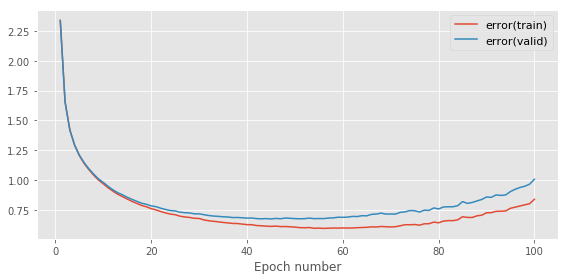

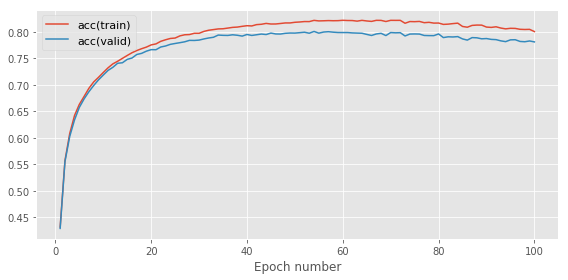

    final error(train) = 8.38e-01
    final error(valid) = 1.01e+00
    final acc(train)   = 8.01e-01
    final acc(valid)   = 7.81e-01
    run time per epoch = 6.24


In [6]:
#setup hyperparameters
learning_rate = 0.00002
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


print('-' * 80)
print('learning_rate={0:.2e}'
      .format(learning_rate))
print('-' * 80)

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create a model with three hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, fig_name='Adam_three_hidden_layers.pdf', notebook=True)

plt.show()

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

# final_errors_train.append(stats[-1, keys['error(train)']])
# final_errors_valid.append(stats[-1, keys['error(valid)']])
# final_accs_train.append(stats[-1, keys['acc(train)']])
# final_accs_valid.append(stats[-1, keys['acc(valid)']])